In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [98]:
df=pd.read_csv('ecommerce_transactions.csv')

In [99]:
df.shape

(350, 11)

In [100]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [101]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [103]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [106]:
df.dropna(inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB


In [108]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [109]:
Gender = df['Gender'].value_counts().reset_index()
Gender

,Gender,count
0,Male,175
1,Female,173


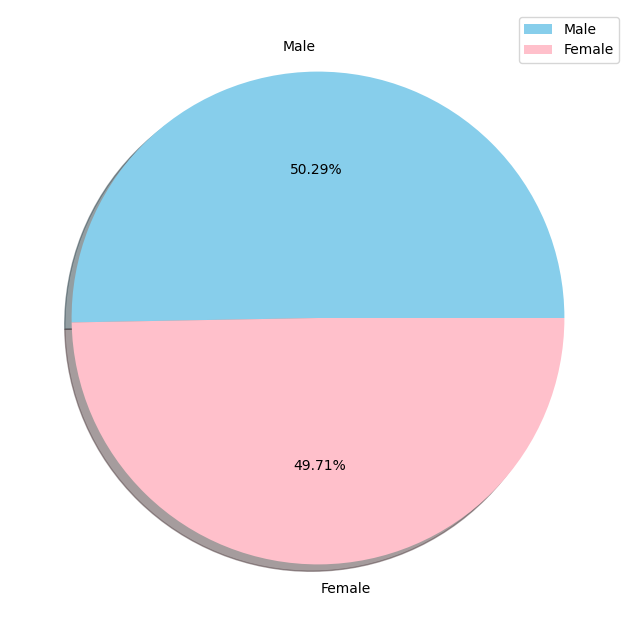

In [110]:
plt.figure(figsize=(8,8))
plt.pie(Gender['count'], colors=['skyblue', 'pink'],
        shadow=True,labels=Gender['Gender'],
        autopct='%1.2f%%'
       )
plt.legend()
plt.show()

In [111]:
GenderwithAge = df.groupby('Gender')['Age'].value_counts().reset_index()
GenderwithAge

,Gender,Age,count
0,Female,43,25
1,Female,30,24
2,Female,31,24
3,Female,36,24
4,Female,41,24
5,Female,37,22
6,Female,32,9
7,Female,38,9
8,Female,42,9
9,Female,29,2


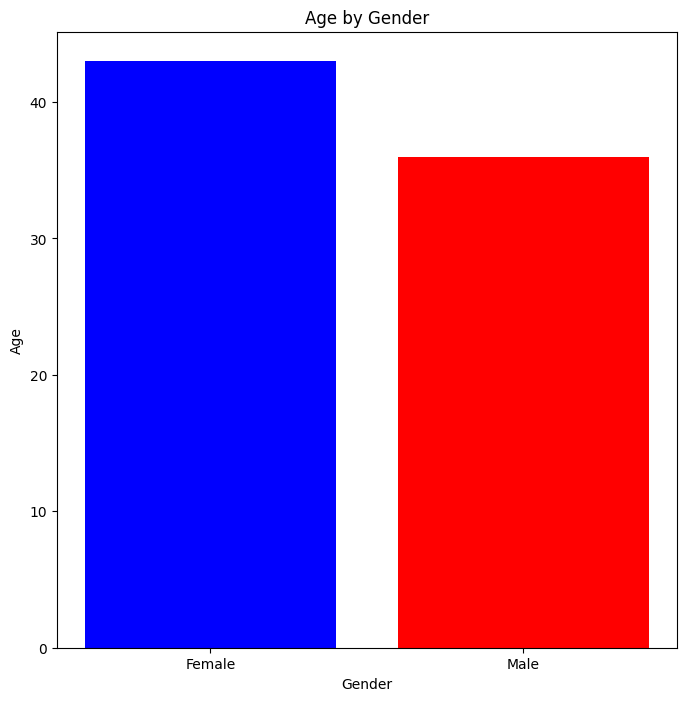

In [112]:
plt.figure(figsize=(8,8))
plt.bar(GenderwithAge['Gender'], GenderwithAge['Age'],
        color=['blue', 'red'],
       )
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age by Gender')
plt.show()

In [113]:
GenderWithMembershiptype = df[['Gender','Membership Type']].value_counts().reset_index()
GenderWithMembershiptype

,Gender,Membership Type,count
0,Male,Silver,116
1,Female,Bronze,114
2,Male,Gold,59
3,Female,Gold,58
4,Female,Silver,1


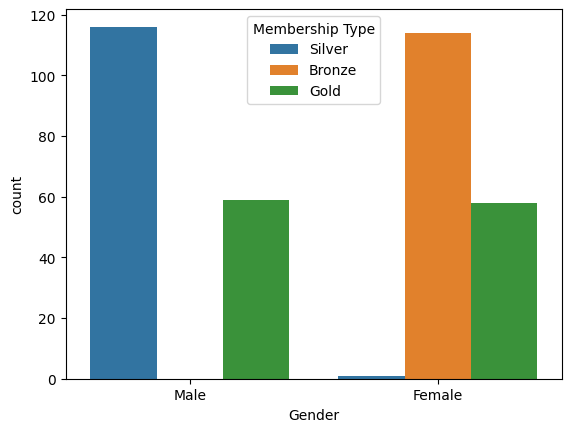

In [114]:
sns.barplot(data=GenderWithMembershiptype, x='Gender', y='count', hue='Membership Type')
plt.show()

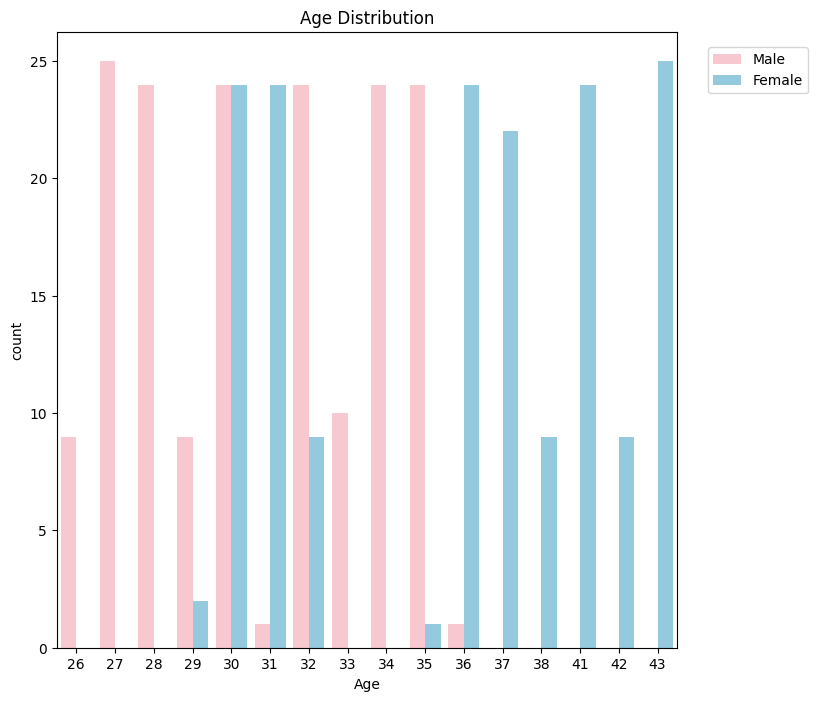

In [115]:
gender_age_data = df[['Gender', 'Age']].value_counts().reset_index().sort_values(ascending=False, by='count')

plt.figure(figsize=(8, 8))
sns.barplot(data=gender_age_data, x='Age', y='count', hue='Gender', palette=['pink', 'skyblue'])
plt.title("Age Distribution")
plt.legend(loc=(1.05,0.9))
plt.show()

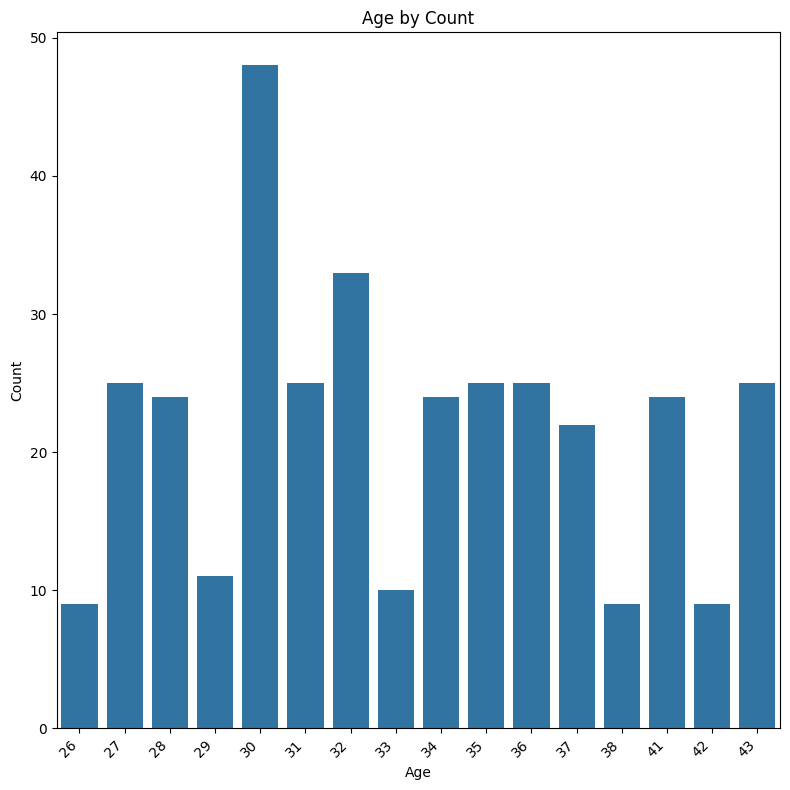

In [116]:
age_data = df['Age'].value_counts().reset_index()
plt.figure(figsize=(8, 8))
sns.barplot(data=age_data,x='Age', y='count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  #
plt.title('Age by Count')
plt.tight_layout() 
plt.show()

In [117]:
city = df['City']
city

0           New York
1        Los Angeles
2            Chicago
3      San Francisco
4              Miami
           ...      
345            Miami
346          Houston
347         New York
348      Los Angeles
349          Chicago
Name: City, Length: 348, dtype: object

In [118]:
GenderwithCity = df[['Gender','City']].value_counts().reset_index()
GenderwithCity

,Gender,City,count
0,Male,Los Angeles,59
1,Female,Chicago,58
2,Female,New York,58
3,Male,San Francisco,58
4,Male,Miami,57
5,Female,Houston,56
6,Female,Miami,1
7,Male,New York,1


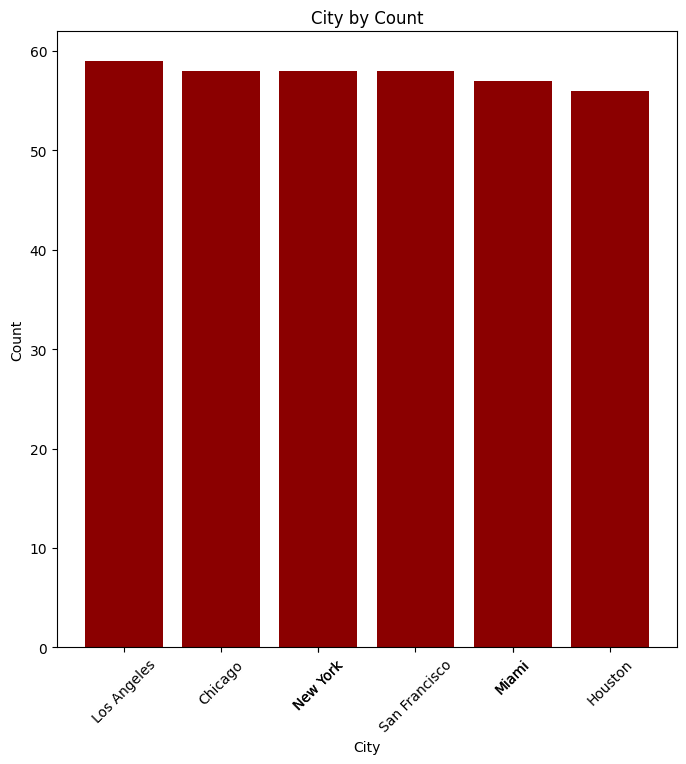

In [119]:
xticks = GenderwithCity['City']
plt.figure(figsize=(8,8))
plt.bar(GenderwithCity['City'], GenderwithCity['count'],
        color='darkred',
       )
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(xticks,rotation=45)
plt.title('City by Count')
plt.show()

In [120]:
GenderwithCity = df['City'].value_counts().reset_index()
GenderwithCity

,City,count
0,New York,59
1,Los Angeles,59
2,Chicago,58
3,San Francisco,58
4,Miami,58
5,Houston,56


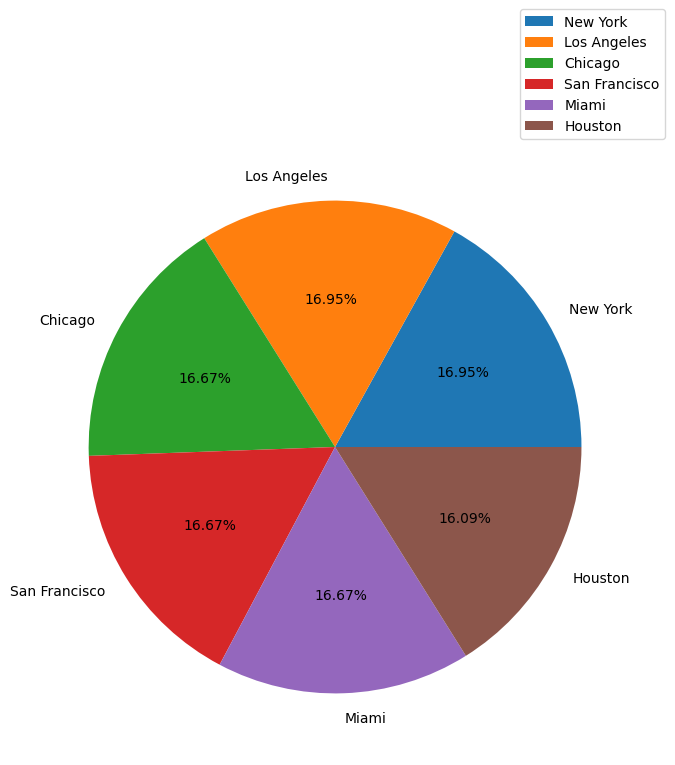

In [121]:
plt.figure(figsize=(8,8))
plt.pie(GenderwithCity['count'],
        shadow=False,labels= GenderwithCity['City'],
        autopct='%1.2f%%'
       )
plt.legend(loc=(0.8,1))
plt.show()

In [122]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [123]:
MembershipType = df['Membership Type'].value_counts().reset_index()
MembershipType

,Membership Type,count
0,Gold,117
1,Silver,117
2,Bronze,114


/var/folders/lg/yh68bnfn6pb_lt3_47jnjhm40000gn/T/ipykernel_6837/1577557860.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(1.1,0.8))


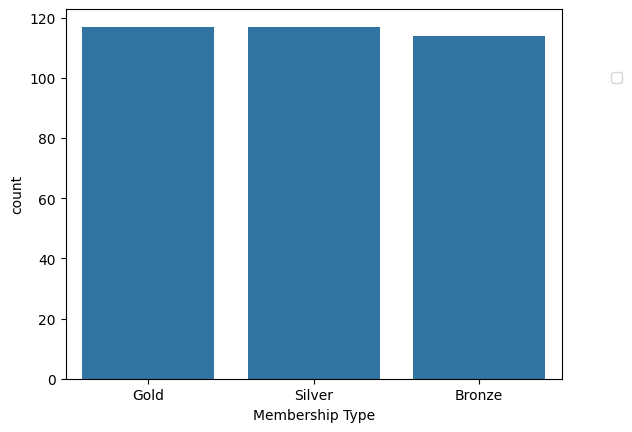

In [124]:
sns.barplot(data=MembershipType, x='Membership Type', y='count' )
plt.legend(loc=(1.1,0.8))
plt.show()

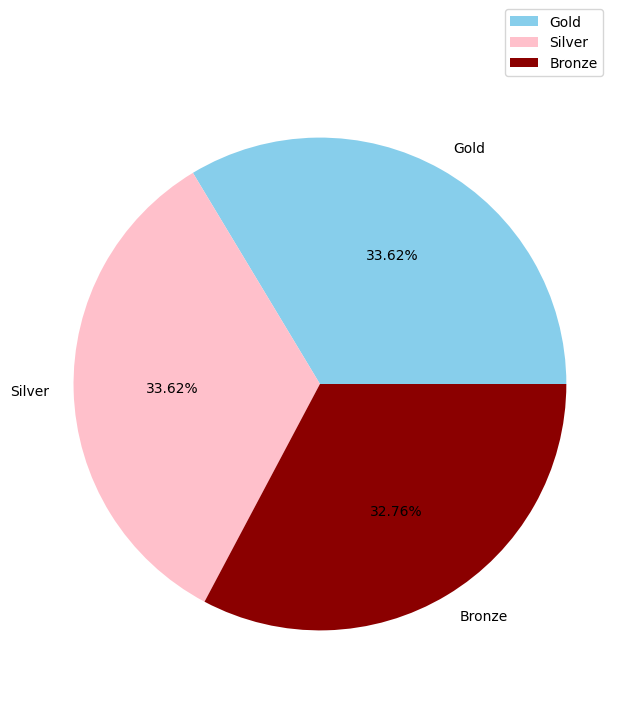

In [125]:
plt.figure(figsize=(8,8))
plt.pie(MembershipType['count'], colors=['skyblue', 'pink','darkred'],labels= MembershipType['Membership Type'],
        autopct='%1.2f%%'
       )
plt.legend(loc=(0.8,1))
plt.show()

In [126]:
MembershipTypeandTotalSpend = df[['Membership Type','Total Spend']].value_counts().reset_index().sort_values(by='Total Spend',ascending=True)
MembershipTypeandTotalSpend 

,Membership Type,Total Spend,count
55,Bronze,410.8,1
39,Bronze,420.8,4
59,Bronze,430.5,1
6,Bronze,430.8,11
41,Bronze,440.5,3
...,...,...,...
31,Gold,1480.1,5
73,Gold,1480.3,1
7,Gold,1490.1,11
24,Gold,1500.1,7


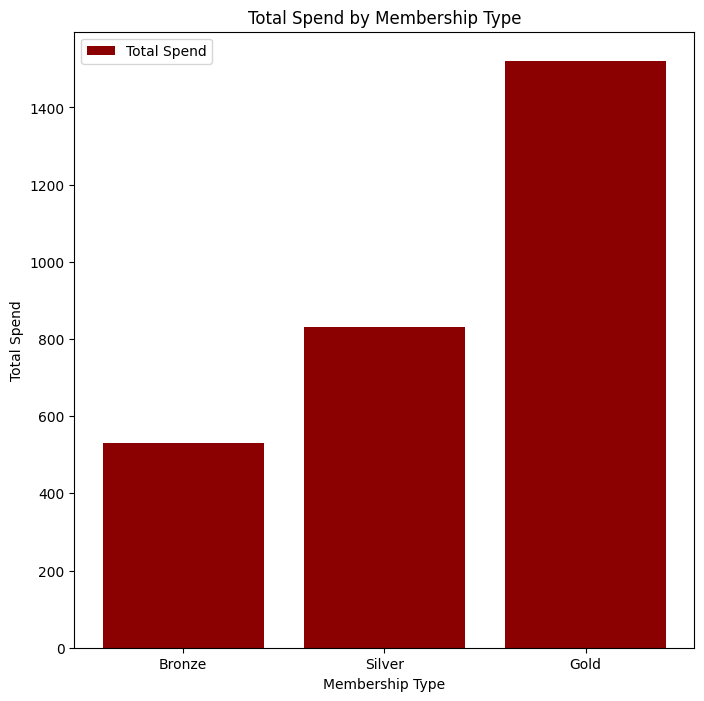

In [127]:
plt.figure(figsize=(8,8))
plt.bar(MembershipTypeandTotalSpend['Membership Type'], MembershipTypeandTotalSpend['Total Spend'], label='Total Spend',color='darkred')
plt.legend(loc='upper left')  
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.title('Total Spend by Membership Type')
plt.show()


In [128]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


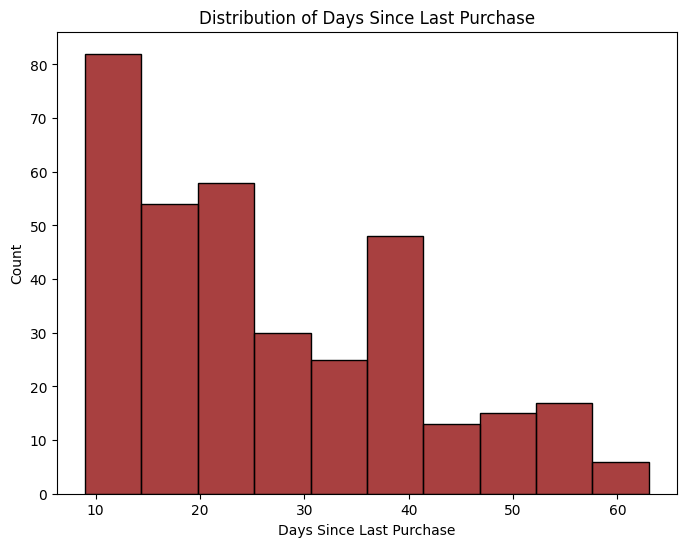

In [129]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Days Since Last Purchase'],color='darkred')
plt.title("Distribution of Days Since Last Purchase")
plt.show()

In [130]:
SatisfactionLevel = df['Satisfaction Level'].value_counts().reset_index()
SatisfactionLevel

,Satisfaction Level,count
0,Satisfied,125
1,Unsatisfied,116
2,Neutral,107


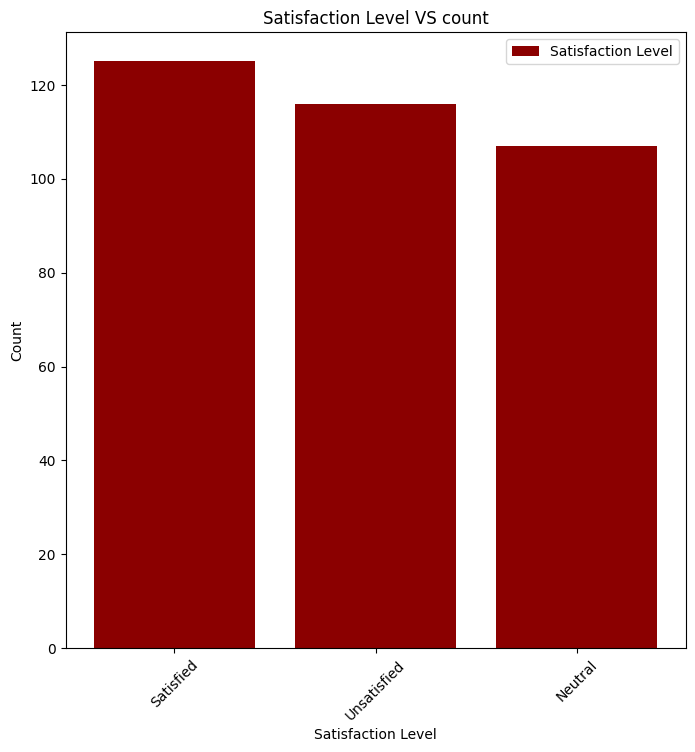

In [131]:
xticks = SatisfactionLevel['Satisfaction Level']
plt.figure(figsize=(8,8))
plt.bar(SatisfactionLevel['Satisfaction Level'], SatisfactionLevel['count'], label='Satisfaction Level',color='darkred')
plt.legend(loc='upper right')  # Adjust the location of the legend as needed
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.xticks(xticks,rotation=45)
plt.title('Satisfaction Level VS count')
plt.show()


In [132]:
SatistactionLevelandaveragespend = df.groupby('Satisfaction Level')['Total Spend'].mean().reset_index()
SatistactionLevelandaveragespend

,Satisfaction Level,Total Spend
0,Neutral,616.414019
1,Satisfied,1280.319200
2,Unsatisfied,595.136207


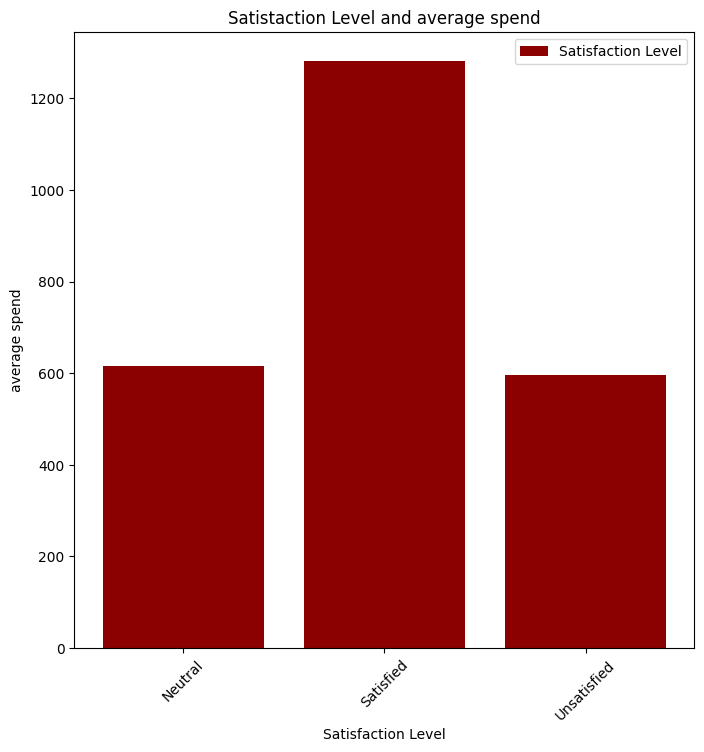

In [133]:
xticks = SatistactionLevelandaveragespend['Satisfaction Level']
plt.figure(figsize=(8,8))
plt.bar(SatistactionLevelandaveragespend['Satisfaction Level'], SatistactionLevelandaveragespend['Total Spend'], label='Satisfaction Level',color='darkred')
plt.legend(loc='upper right')  # Adjust the location of the legend as needed
plt.xlabel('Satisfaction Level')
plt.ylabel('average spend')
plt.xticks(xticks,rotation=45)
plt.title('Satistaction Level and average spend')
plt.show()


In [134]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [135]:
ItemsPurschased = df.groupby('Satisfaction Level')['Items Purchased'].mean().reset_index()
ItemsPurschased

,Satisfaction Level,Items Purchased
0,Neutral,9.439252
1,Satisfied,17.320000
2,Unsatisfied,10.525862


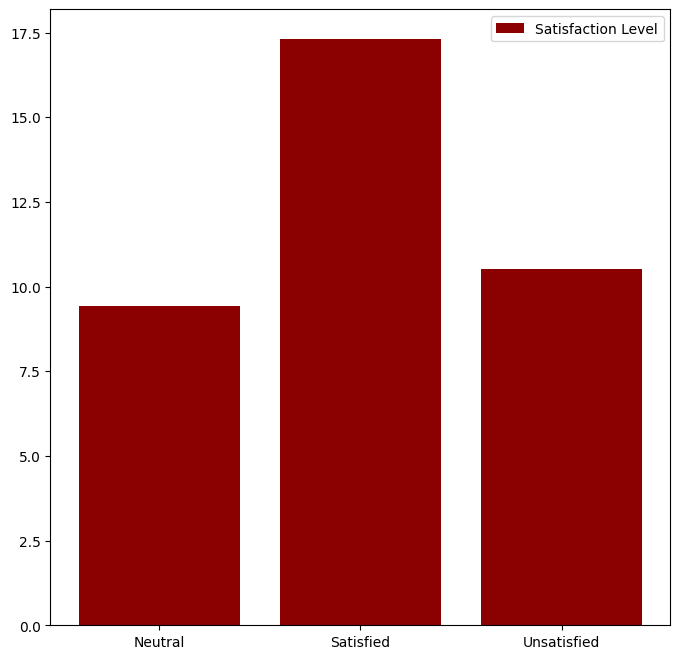

In [136]:
plt.figure(figsize=(8,8))
plt.bar(ItemsPurschased['Satisfaction Level'],ItemsPurschased['Items Purchased'],
        label='Satisfaction Level',color='darkred'
       )
plt.legend()
plt.show()

In [137]:
ItemsPurschased = df.groupby('Gender')['Items Purchased'].value_counts().reset_index()
ItemsPurschased

,Gender,Items Purchased,count
0,Female,9,34
1,Female,8,33
2,Female,10,24
3,Female,15,24
4,Female,16,24
5,Female,7,23
6,Female,14,11
7,Male,12,33
8,Male,13,32
9,Male,11,28


/var/folders/lg/yh68bnfn6pb_lt3_47jnjhm40000gn/T/ipykernel_6837/1266225593.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


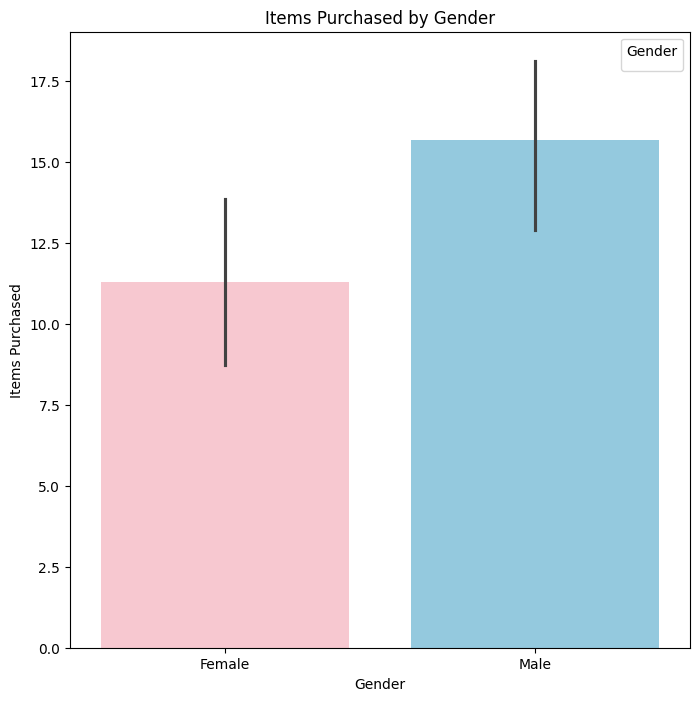

In [138]:
plt.figure(figsize=(8, 8))
sns.barplot(data=ItemsPurschased, x='Gender', y='Items Purchased', hue='Gender',
            palette=['pink', 'skyblue'])

plt.legend(title='Gender')
plt.xlabel('Gender')
plt.ylabel('Items Purchased')
plt.title('Items Purchased by Gender')
plt.show()

In [139]:
DiscountApplied = df['Discount Applied'].value_counts().reset_index()
DiscountApplied

,Discount Applied,count
0,True,175
1,False,173


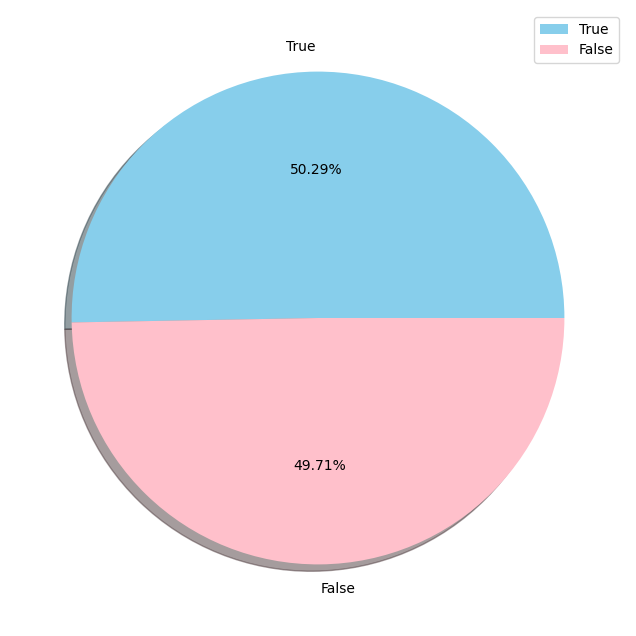

In [140]:
plt.figure(figsize=(8,8))
plt.pie(DiscountApplied['count'], colors=['skyblue', 'pink'],
        shadow=True,labels=DiscountApplied['Discount Applied'],
        autopct='%1.2f%%'
       )
plt.legend()
plt.show()

In [141]:
DiscountApplied = df.groupby('Gender')['Discount Applied'].value_counts().reset_index()
DiscountApplied

,Gender,Discount Applied,count
0,Female,True,117
1,Female,False,56
2,Male,False,117
3,Male,True,58


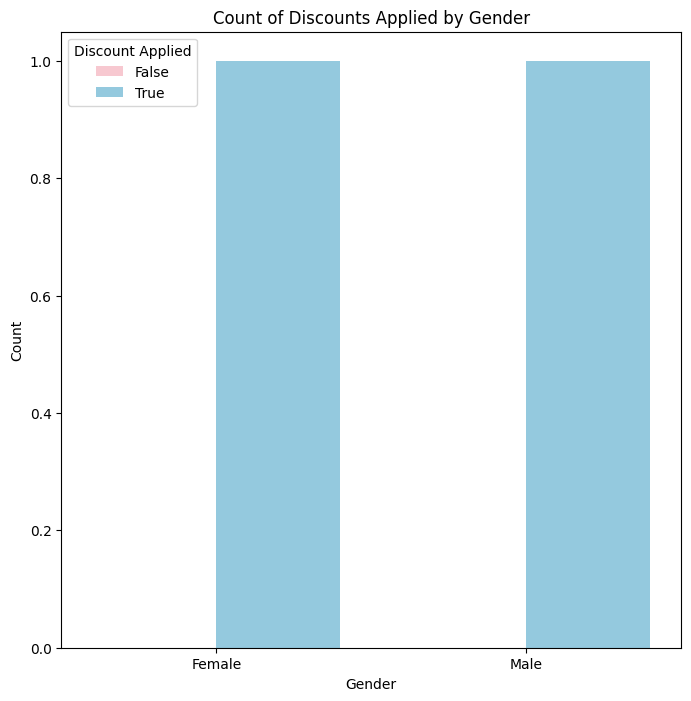

In [142]:
plt.figure(figsize=(8, 8))
sns.barplot(data=DiscountApplied, x='Gender', y='Discount Applied', hue='Discount Applied', palette=['pink', 'skyblue'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Discounts Applied by Gender')
plt.legend(title='Discount Applied')
plt.show()

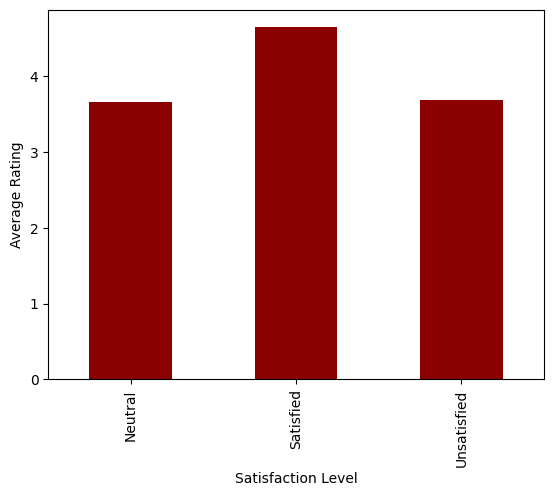

In [143]:
satisfaction_rating = df.groupby('Satisfaction Level')['Average Rating'].mean()
satisfaction_rating.plot.bar(color='darkred')
plt.ylabel('Average Rating')
plt.show()